In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
### read the dataset
#df =pd.read_csv(r"C:\Users\imsau\Favorites\ML-QI\height-weight.csv")
df = pd.read_csv("datasets/height-weight.csv")

In [5]:
df.head

<bound method NDFrame.head of     Weight  Height
0       45     120
1       58     135
2       48     123
3       60     145
4       70     160
5       78     162
6       80     163
7       90     175
8       95     182
9       78     170
10      82     176
11      95     182
12     105     175
13     100     183
14      85     170
15      78     177
16      50     140
17      65     159
18      76     150
19      87     167
20      45     129
21      56     140
22      72     160>

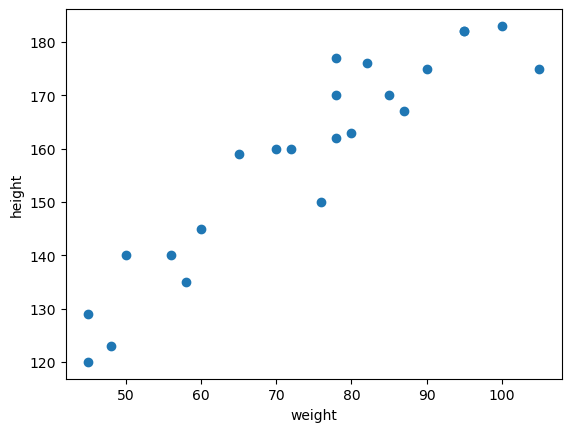

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [7]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [8]:
X=df[['Weight']]
y=df[['Height']]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [10]:
y_train

,Height
12,175
1,135
13,183
5,162
2,123
11,182
20,129
3,145
4,160
18,150


In [11]:
#standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

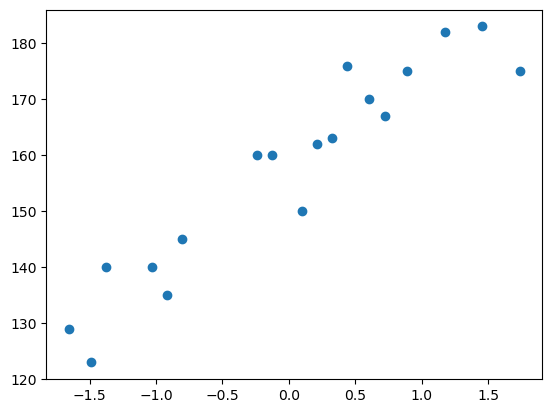

In [12]:
plt.scatter(X_train,y_train)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [14]:
regressor

LinearRegression()

In [15]:
type(X_train)

numpy.ndarray

In [16]:
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
regressor.coef_

array([[17.03440872]])

In [18]:
regressor.intercept_

array([157.5])

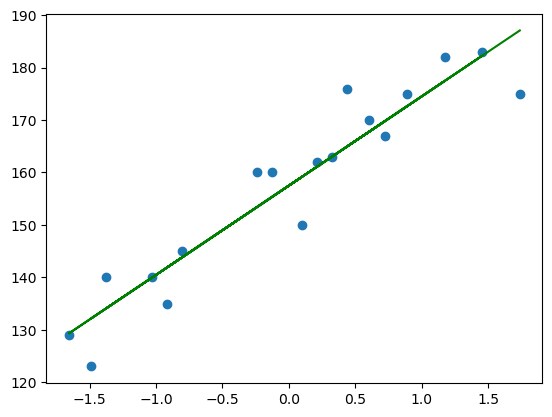

In [19]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'g')
plt.show()

In [21]:
y_pred_test = regressor.predict(X_test)

In [22]:
y_pred_test,y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

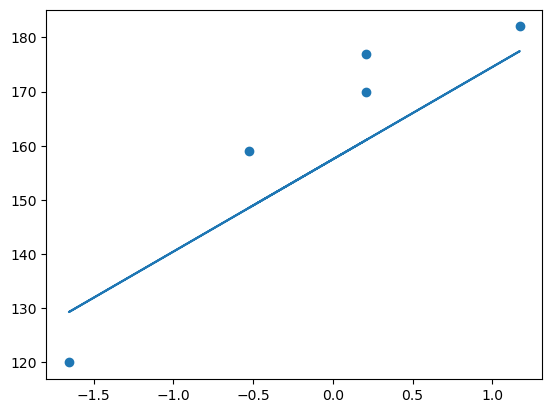

In [23]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test)
plt.show()

In [24]:
## performance matrix
## mse,mae,rmse, r2,ad.rsq

from sklearn.metrics import mean_squared_error,mean_absolute_error


In [25]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mae,mse,rmse)

9.822657814519232 109.77592599051664 10.477400726827081


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_test)

In [27]:
r2

0.776986986042344

In [28]:
#display adjusted R-squared
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [30]:
##new data point(weight new)
scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\imsau\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [31]:
regressor.predict(scaled_weight)

array([[163.01076266]])

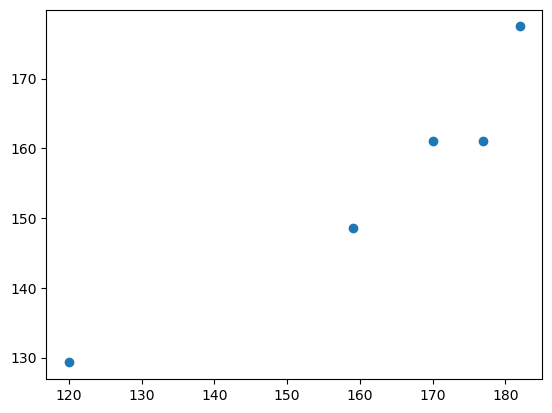

In [32]:
plt.scatter(y_test,y_pred_test)
plt.show()

In [33]:
residuals=y_test-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


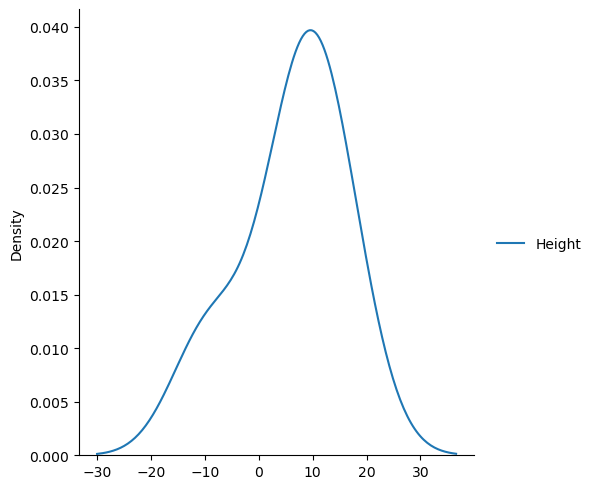

In [36]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")
plt.show()

## OLS linear regression

In [93]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [95]:
model.summary()

C:\Users\imsau\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Sat, 26 Jul 2025   Prob (F-statistic):                       0.661
Time:                        14:31:25   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.0344     38.226      0.446      0.661     -63.616      97.684
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.661
Skew:                          -0.428   Prob(JB):                        0.718
Kurtosis:                       2.614   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""